<a href="https://colab.research.google.com/github/uildanila/Classification-of-Earthquake-s-Distribution/blob/main/Earthquake_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification of Earthquakes Distribution on Active Faults in Sulawesi Island Using K-NN**
Created by : Nila Wildanul Husna

**List of Content**
1. Problem Understanding
1. Data Preparation
1. Modelling
1. Conclusion
1. Recommendation

***
# ***Problem Understanding & Data Understanding***

**Context**

*Sulawesi* merupakan wilayah Indonesia yang rawan terhadap gempa bumi tektonik karena secara geologis terletak pada pertemuan empat lempeng utama dunia yaitu lempeng Eurasia, lempeng Indo-Australia, lempeng Pasifik dan satu lempeng mikro yaitu lempeng Laut Filipina. Sulawesi juga seakan dibagi oleh berbagai patahan atau sesar (fault). Beberapa sesar yang aktif diantaranya Sesar Palu Koro, Sesar Matano, Sesar Saddang, Sesar Walanae, dan Sesar Lawanopo.

**Problem Statement**

Pada tanggal 28 September 2018 gempa bumi dan tsunami terjadi di wilayah Donggala dan Palu dengan magnitudo 7,4 SR menyebabkan peningkatan aktivitas sesar/patahan yang berada di wilayah Sulawesi dan mengakibatkan peningkatan gempa swarm secara signifikan yang terjadi di beberapa lokasi, seperti Mamasa, Pare-Pare, dan lokasi lainnya. Gempa swarm adalah sebuah peristiwa dimana suatu area lokal mengalami sekuens aktivitas gempa yang memiliki magnitudo kecil (M<5) tanpa adanya gempa kuat sebagai gempa utama dengan variasi durasi antara harian, minggu atau bulan. Baru-baru ini gempa bumi yang cukup signifikan terjadi di wilayah Mamuju, Sulawesi Barat dan sekitarnya pada tanggal 14 Januari 2021 pukul 14.35 WITA dengan magnitudo 5,9 SR dan setelah 13 jam kemudian, terjadi gempa bumi susulan yang lebih besar di wilayah Majene (Mw=6.2). Adapun daerah – daerah yang harus mendapat perhatian dan harus diwaspadai adalah daerah perpotongan atau persinggungan di antara sesar, karena di daerah ini gempa dapat bergenerasi dan berpotensi menimbulkan bencana geologi. Sehingga pemerintah ingin memiliki kemampuan untuk bisa mengklasifikasikan distribusi kejadian gempa bumi yang berada disekitar wilayah sesar di pulau Sulawesi agar bisa melakukan analisis dan peninjauan lebih lanjut terkait wilayah tersebut serta .

**Goals**

Dengan menggunakan K-Nearest Neighbors, kita  mendapatkan peta sebaran gempa bumi yang diperoleh dari hasil klasifikasi gempa bumi yang ditampilkan sebagai bentuk gambaran informasi dan peringatan dini terhadap wilayah-wilayah yang memiliki tingkat seismisitas yang tinggi berdasarkan magnitude gempa bumi.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan wilayah-wilayah sesar yang memiliki histori magnitude dan kedalaman kejadian gempa bumi yang telah terjadi.

Selanjutnya, kita akan membangun suatu model klasifikasi yang akan membantu pemerintah untuk dapat menyediakan 'tool' prediksi kejadian gempa bumi berdasarkan wilayah sesar.

***
## ***Data Understanding***

Dataset diperoleh dari Stasiun Geofisika BMKG Gowa. Data ini ditampilkan dalam bentuk data informasi yang melibatkan waktu kejadian, lokasi, magnitude, dan kedalaman.

### Attibute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Date | Float | Tenure of customer in ecommerce company |
| Mag | Float | Distance in between warehouse to home of customer |
| Latitude | Integer | Total number of devices is registered on particular customer |
| Longitude | Text | Preferred order category of customer in last month |
| Depth | Integer | Satisfactory score of customer on service |
| KETERANGAN_LOKASI | Text | Marital status of customer |
| Patahan | Integer | Total number of added added on particular customer |

***
## ***Import Library***

In [2]:
!pip install git+https://github.com/giswqs/leafmap.git
!pip install keplergl
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/giswqs/leafmap.git to /tmp/pip-req-build-ec5izrva
  Running command git clone -q https://github.com/giswqs/leafmap.git /tmp/pip-req-build-ec5izrva
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keplergl-0.3.2.tar.gz (9.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 13.9 MB/s 
     |████████████████████████████████| 16.7 MB 54.6 MB/s 
     |████████████████████████████████| 6.3 MB 67.8 MB/s 
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922344 sha256=3abe39eda237157a90d12478543c5ebcdc45a2f9e5bd89b7f21a550f7120e434
  Stored in directory: /root/.cache/pip/wheels/4b/19/e5/0852b7888ee350e9c57087ccc61eeab9daf50f5caac9c690ec
Successfull

In [5]:
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, train_test_split
from scipy import stats
import category_encoders as ce

# Feature Engineering
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline


# Map
from keplergl import KeplerGl
from IPython.display import Javascript
import leafmap.kepler as leafmap

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***
# **Data Preparation and Cleaning**

***

#### **Load Dataset**

In [7]:
df = pd.read_excel('drive/MyDrive/Colab Notebooks/data earthquake classification/dataset_2015_2020.xlsx')
df

,Event_ID,Text_Date,Mag,Lattitude,Longitude,Depth,Patahan
0,01-01-2015 13:13,01-01-2015,3.4,-1.99,120.41,17,Patahan Matano
1,01-01-2015 12:33,01-01-2015,3.3,-1.88,120.30,24,Patahan Palu Koro
2,02-01-2015 06:20,02-01-2015,4.8,-2.22,120.87,17,Patahan Matano
3,02-01-2015 02:34,02-01-2015,4.5,-2.21,120.87,12,Patahan Matano
4,02-01-2015 01:11,02-01-2015,4.1,-2.17,120.77,10,Patahan Matano
...,...,...,...,...,...,...,...
4652,29-12-2020 11:34,29-12-2020,3.0,-2.51,120.71,10,Patahan Matano
4653,30-12-2020 03:34,30-12-2020,2.5,-2.17,121.20,10,Patahan Matano
4654,30-12-2020 03:14,30-12-2020,3.3,-1.37,120.47,10,Patahan Palu Koro
4655,30-12-2020 04:48,30-12-2020,2.9,-1.36,119.64,10,Patahan Palu Koro


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Event_ID   4657 non-null   object 
 1   Text_Date  4657 non-null   object 
 2   Mag        4657 non-null   float64
 3   Lattitude  4657 non-null   float64
 4   Longitude  4657 non-null   float64
 5   Depth      4657 non-null   int64  
 6   Patahan    4657 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 254.8+ KB


In [9]:
# Checking for duplicate data

df[df.duplicated()]

,Event_ID,Text_Date,Mag,Lattitude,Longitude,Depth,Patahan
2859,31-01-2019 15:06,31-01-2019,2.1,-3.12,119.4,10,Patahan Saddang


In [10]:
# Drop Duplicated Data

df.drop_duplicates(inplace=True)

In [11]:
df

,Event_ID,Text_Date,Mag,Lattitude,Longitude,Depth,Patahan
0,01-01-2015 13:13,01-01-2015,3.4,-1.99,120.41,17,Patahan Matano
1,01-01-2015 12:33,01-01-2015,3.3,-1.88,120.30,24,Patahan Palu Koro
2,02-01-2015 06:20,02-01-2015,4.8,-2.22,120.87,17,Patahan Matano
3,02-01-2015 02:34,02-01-2015,4.5,-2.21,120.87,12,Patahan Matano
4,02-01-2015 01:11,02-01-2015,4.1,-2.17,120.77,10,Patahan Matano
...,...,...,...,...,...,...,...
4652,29-12-2020 11:34,29-12-2020,3.0,-2.51,120.71,10,Patahan Matano
4653,30-12-2020 03:34,30-12-2020,2.5,-2.17,121.20,10,Patahan Matano
4654,30-12-2020 03:14,30-12-2020,3.3,-1.37,120.47,10,Patahan Palu Koro
4655,30-12-2020 04:48,30-12-2020,2.9,-1.36,119.64,10,Patahan Palu Koro


#### **Data Information**

In [12]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missingValue', 'missingValue_Pct', 'uniqueValue'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,missingValue,missingValue_Pct,uniqueValue
0,Event_ID,object,0,0.0,4488
1,Text_Date,object,0,0.0,1280
2,Mag,float64,0,0.0,51
3,Lattitude,float64,0,0.0,531
4,Longitude,float64,0,0.0,484
5,Depth,int64,0,0.0,179
6,Patahan,object,0,0.0,5


Jika diperhatikan, tidak terdapat missing value pada dataset yang akan digunakan.

In [13]:
# Change Data Type
df["Event_ID"]  = df["Event_ID"].astype("datetime64")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4656 entries, 0 to 4656
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Event_ID   4656 non-null   datetime64[ns]
 1   Text_Date  4656 non-null   object        
 2   Mag        4656 non-null   float64       
 3   Lattitude  4656 non-null   float64       
 4   Longitude  4656 non-null   float64       
 5   Depth      4656 non-null   int64         
 6   Patahan    4656 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 291.0+ KB


***
# **Exploratory Data Analysis (EDA)**

***

In [15]:
def stackbar_h(data, x, y, hover_data, color, labels, width, height, title, xaxis, yaxis):
    fig = px.bar(data, y=y, x=x,
             hover_data=hover_data, color=color,
             labels=labels, width=width, height=height, orientation='h')
    fig.update_layout(
            autosize=False,
            title=title,
                        xaxis_title=xaxis,
                        yaxis_title=yaxis,
            yaxis={'categoryorder':'total ascending'})
    return fig.show()

In [16]:
# Identifying numerical variables
num_vars = [var for var in df.columns if df[var].dtype != 'O' and var !='Churn' and df[var].dtype != '<M8[ns]']
cont_vars = [var for var in num_vars if df[var].nunique() > 14]
date_vars = [var for var in df.columns if df[var].dtype == '<M8[ns]']

print(f'There are {len(num_vars)} numerical features:\n{num_vars}')

print(f'\nContinous Variables:\n{cont_vars}')
print(f'\nDiscrete Variables:\n{date_vars}')

There are 4 numerical features:
['Mag', 'Lattitude', 'Longitude', 'Depth']

Continous Variables:
['Mag', 'Lattitude', 'Longitude', 'Depth']

Discrete Variables:
['Event_ID']


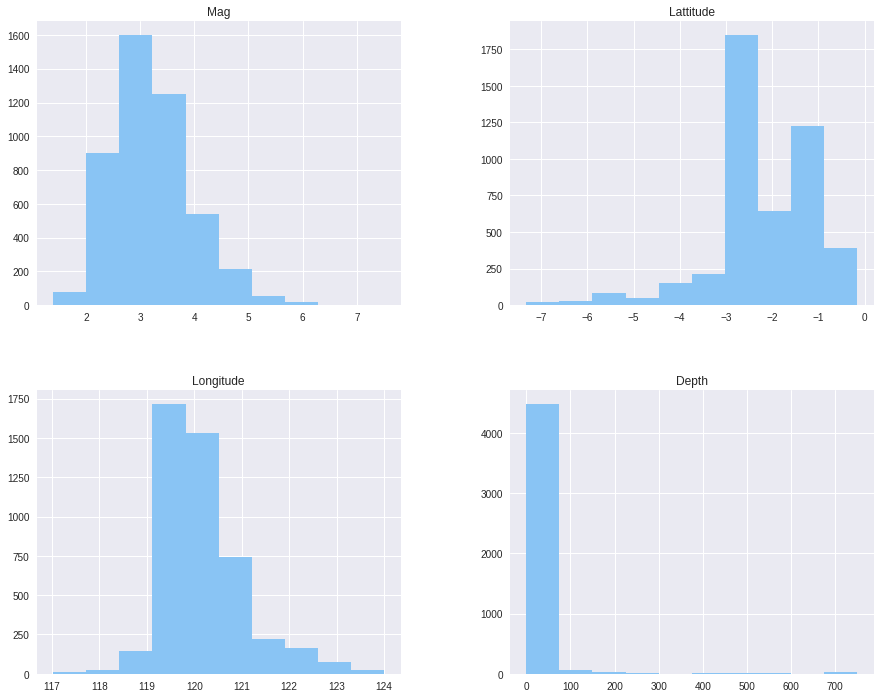

In [17]:
plt.style.use('seaborn')
df[num_vars].hist(figsize = (15,12), color='#89C4F4')
plt.show()

## **Magnitude of Earthquakes**

Jenis Gempa Berdasarkan Kekuatan
* Gempa kuat M ≥ 5.0
* Gempa sedang 3.0 < M < 5.0
* Gempa kecil M ≤ 3.0

Jenis Gempa Berdasarkan Kedalaman Hiposenter
* Gempa dangkal (shallow), dengan kedalaman kurang dari 70 km.
* Gempa menengah (intermediate), dengan kedalaman lebih besar dari 70 km dan kurang dari 300 km.
* Gempa dalam (deep), dengan kedalaman lebih dari 300 km.

In [18]:
def magnitude(x):
    if x >= 5.0:
        result = 'Gempa Kuat'
    elif x < 5.0  and x > 3.0:
        result = 'Gempa Sedang'
    else:
        result = 'Gempa Kecil'
    return result

def depth(x):
    if x >= 300:
        result = 'Gempa Dalam'
    elif x < 300  and x > 70:
        result = 'Gempa Menengah'
    else:
        result = 'Gempa Dangkal'
    return result

In [19]:
df['Jenis Gempa'] = [magnitude(i) for i in df['Mag']]
df['Jenis Kedalaman'] = [depth(i) for i in df['Depth']]

In [20]:
df.head()

,Event_ID,Text_Date,Mag,Lattitude,Longitude,Depth,Patahan,Jenis Gempa,Jenis Kedalaman
0,2015-01-01 13:13:00,01-01-2015,3.4,-1.99,120.41,17,Patahan Matano,Gempa Sedang,Gempa Dangkal
1,2015-01-01 12:33:00,01-01-2015,3.3,-1.88,120.30,24,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
2,2015-02-01 06:20:00,02-01-2015,4.8,-2.22,120.87,17,Patahan Matano,Gempa Sedang,Gempa Dangkal
3,2015-02-01 02:34:00,02-01-2015,4.5,-2.21,120.87,12,Patahan Matano,Gempa Sedang,Gempa Dangkal
4,2015-02-01 01:11:00,02-01-2015,4.1,-2.17,120.77,10,Patahan Matano,Gempa Sedang,Gempa Dangkal


In [21]:
df_jenisGempa = df.groupby(['Patahan', 'Jenis Gempa'])[['Jenis Gempa']].count().rename(columns={'Jenis Gempa' : 'Total'}).reset_index()
df_jenisKedalaman = df.groupby(['Patahan', 'Jenis Kedalaman'])[['Jenis Kedalaman']].count().rename(columns={'Jenis Kedalaman' : 'Total'}).reset_index()

In [22]:
stackbar_h(df_jenisGempa, y='Patahan', x='Total',
           hover_data=['Jenis Gempa', 'Total'], color='Jenis Gempa',
           labels={'Jenis Gempa':'Jenis Gempa'}, width=1000, height=500,
           title="Eartquake's Magnitude each Faults Area",
           xaxis='Total Earthquakes',
           yaxis='Faults',
           )

In [23]:
stackbar_h(df_jenisKedalaman, y='Patahan', x='Total',
           hover_data=['Jenis Kedalaman', 'Total'], color='Jenis Kedalaman',
           labels={'Jenis Kedalaman':'Jenis Kedalaman'}, width=1000, height=500,
           title="Eartquake's Depth each Faults Area",
           xaxis='Total Earthquakes',
           yaxis='Faults',
           )

***
**Observation :**

- Berdasarkan 

***

***
# **Modeling & Evaluation**

***

In [24]:
df

,Event_ID,Text_Date,Mag,Lattitude,Longitude,Depth,Patahan,Jenis Gempa,Jenis Kedalaman
0,2015-01-01 13:13:00,01-01-2015,3.4,-1.99,120.41,17,Patahan Matano,Gempa Sedang,Gempa Dangkal
1,2015-01-01 12:33:00,01-01-2015,3.3,-1.88,120.30,24,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
2,2015-02-01 06:20:00,02-01-2015,4.8,-2.22,120.87,17,Patahan Matano,Gempa Sedang,Gempa Dangkal
3,2015-02-01 02:34:00,02-01-2015,4.5,-2.21,120.87,12,Patahan Matano,Gempa Sedang,Gempa Dangkal
4,2015-02-01 01:11:00,02-01-2015,4.1,-2.17,120.77,10,Patahan Matano,Gempa Sedang,Gempa Dangkal
...,...,...,...,...,...,...,...,...,...
4652,2020-12-29 11:34:00,29-12-2020,3.0,-2.51,120.71,10,Patahan Matano,Gempa Kecil,Gempa Dangkal
4653,2020-12-30 03:34:00,30-12-2020,2.5,-2.17,121.20,10,Patahan Matano,Gempa Kecil,Gempa Dangkal
4654,2020-12-30 03:14:00,30-12-2020,3.3,-1.37,120.47,10,Patahan Palu Koro,Gempa Sedang,Gempa Dangkal
4655,2020-12-30 04:48:00,30-12-2020,2.9,-1.36,119.64,10,Patahan Palu Koro,Gempa Kecil,Gempa Dangkal


In [25]:
# Define X & y

X = df[['Event_ID', 'Mag', 'Lattitude', 'Longitude', 'Depth']]
y = df['Patahan']

In [26]:
X_training, X_testing, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    test_size = 0.2, 
    random_state = 42) 

In [27]:
X_train = X_training[['Lattitude', 'Longitude']]
X_test = X_testing[['Lattitude', 'Longitude']]

In [28]:
ordinal_mapping = {'Patahan Lawanopo':0, 'Patahan Walanae':1, 'Patahan Matano':2, 'Patahan Saddang':3, 'Patahan Palu Koro':4}
ordinal_original = {0:'Patahan Lawanopo', 1: 'Patahan Walanae', 2:'Patahan Matano', 3:'Patahan Saddang', 4:'Patahan Palu Koro'}

In [29]:
y_train.replace(ordinal_mapping, inplace=True)
y_test.replace(ordinal_mapping, inplace=True)

### **Choose Factor K**

In [30]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)

  y_predict_train = knn.predict(X_train)
  training_accuracies.append(accuracy_score(y_train, y_predict_train))

  y_predict_test = knn.predict(X_test)
  acc_score = accuracy_score(y_test, y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

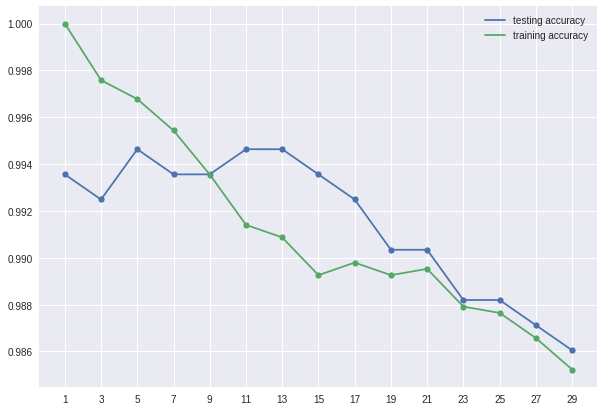

In [31]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k));

In [32]:
list_k = pd.DataFrame(data=[k, testing_accuracies, training_accuracies]).T
list_k.rename(columns={0:'K', 1:'Test_acc', 2:'Train_acc'}, inplace=True)
list_k['difference'] = list_k['Train_acc'] - list_k['Test_acc']
list_k

,K,Test_acc,Train_acc,difference
0,1.0,0.993562,1.000000,0.006438
1,3.0,0.992489,0.997583,0.005094
2,5.0,0.994635,0.996778,0.002142
3,7.0,0.993562,0.995435,0.001873
4,9.0,0.993562,0.993555,-0.000007
5,11.0,0.994635,0.991407,-0.003228
6,13.0,0.994635,0.990870,-0.003765
7,15.0,0.993562,0.989259,-0.004303
8,17.0,0.992489,0.989796,-0.002693
9,19.0,0.990343,0.989259,-0.001084


***
**Observations :**
* Berdasarkan hasil diatas, kita dapat memilih nilai K yang lebih sesuai dan yang terbaik untuk model ini adalah K=3.
***

### **Evaluation : K-Fold Cross Validation**

In [33]:
eval = pd.DataFrame()

for i in range(3,30,2):
    kf = KFold(n_splits=10) 
    estimator = KNeighborsClassifier(n_neighbors = i)
    cross_val = cross_validate(estimator, X_train, y_train, cv=kf)
    hasil = pd.DataFrame(cross_val).describe().iloc[[1]].rename(index={'mean':i}, columns={'fit_time': 'mean_fit_time', 'score_time':'mean_score_time', 'test_score':'mean_test_score'})
    eval = eval.append(hasil)

In [34]:
eval

,mean_fit_time,mean_score_time,mean_test_score
3,0.003383,0.012791,0.991675
5,0.003470,0.013015,0.990872
7,0.003022,0.011139,0.990333
9,0.003299,0.012269,0.988453
11,0.003374,0.012555,0.987917
13,0.003493,0.012572,0.987916
15,0.003211,0.011741,0.987380
17,0.003354,0.013586,0.987379
19,0.003205,0.013012,0.984961
21,0.003256,0.013315,0.984694


Hasil yang diperoleh diatas menunjukkan bahwa hasil evaluasi model menggunakan 10-Fold Cross Validation dengan K=3 untuk K-Nearest Neighbors memberikan nilai rata2 hasil evaluasi yang lebih tinggi jika dibandingkan dengan nilai K lainnya. 

In [35]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

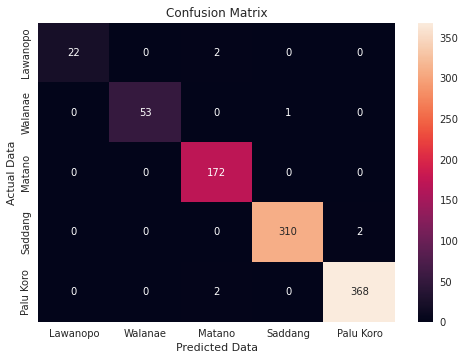

In [36]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Data')
ax.set_ylabel('Actual Data');
ax.xaxis.set_ticklabels(['Lawanopo', 'Walanae', 'Matano', 'Saddang', 'Palu Koro'])
ax.yaxis.set_ticklabels(['Lawanopo', 'Walanae', 'Matano', 'Saddang', 'Palu Koro'])
sns.set(rc={'figure.figsize':(12,8)})
plt.show()

In [37]:
X_test['Patahan'] = y_test
X_test['Patahan_pred'] = y_pred
X_test['Patahan'] = X_test['Patahan'].replace(ordinal_original)
X_test['Patahan_pred'] = X_test['Patahan_pred'].replace(ordinal_original)

In [38]:
#Classification Report
print(classification_report(X_test['Patahan'], X_test['Patahan_pred']))

                   precision    recall  f1-score   support

 Patahan Lawanopo       1.00      0.92      0.96        24
   Patahan Matano       0.98      1.00      0.99       172
Patahan Palu Koro       0.99      0.99      0.99       370
  Patahan Saddang       1.00      0.99      1.00       312
  Patahan Walanae       1.00      0.98      0.99        54

         accuracy                           0.99       932
        macro avg       0.99      0.98      0.99       932
     weighted avg       0.99      0.99      0.99       932



### **Preprocessing New Dataset for Testing**

In [41]:
df_jan = pd.read_excel('drive/MyDrive/Colab Notebooks/data earthquake classification/dataset_januari_2021.xlsx')
df_jan

,Date,Time,Lattitude,Lat,Longitude,Long,Depth,Mag
0,2021/01/31,23:05:54.910,1.03,S,99.54,E,54,3.2
1,2021/01/31,19:58:31.259,4.36,N,126.94,E,28,4.5
2,2021/01/31,16:53:48.276,0.33,S,123.00,E,75,3.8
3,2021/01/31,16:42:38.860,9.35,S,106.99,E,23,4.1
4,2021/01/31,14:53:48.597,5.14,S,130.78,E,10,4.0
...,...,...,...,...,...,...,...,...
666,2021/01/01,03:25:07.781,9.72,S,120.61,E,31,2.5
667,2021/01/01,03:21:15.922,9.90,S,120.74,E,41,3.0
668,2021/01/01,02:33:53.821,1.85,S,120.53,E,10,4.0
669,2021/01/01,00:33:29.697,9.01,S,118.49,E,67,4.3


In [42]:
# Preprocessing

# Coordinate Convert
def convertArea(data):
    data['Lat'] = data['Lat'].apply(lambda x: -1 if x == 'S' else 1)
    data.rename(columns={'Lattitude': 'LatVal'}, inplace=True)
    data['Lattitude'] = data['LatVal'] * data['Lat']
    data.drop(['Long', 'LatVal', 'Lat'], axis=1, inplace=True)
    return data

# Filter Area 
def filterArea(data):
    data = data[(data['Lattitude'] <= -0.15) & (data['Lattitude'] >= -7.5) & (data['Longitude'] >= 115) & (data['Longitude'] <= 124)]
    return data

# Convert time to Local Time
def convertTime(data):
    local_time = []
    for x in data['Time']:
        jam = [int(x.split(':')[0])]
        for i in jam:
            if i+8 >= 24:
                jam_local = i+8-24
            else:
                jam_local = i+8

        minute = x.split(':')[1]
        seconds = int(float(x.split(':')[2]))
        combine = str(jam_local) + ':' + minute + ':' + str(seconds)
        local_time.append(combine)
        
    data['Local_Time'] = local_time
    data['Event_ID'] = data['Date']+' '+data['Local_Time']
    data["Event_ID"]  = data["Event_ID"].astype("datetime64")
    return data

def jenisMagDepth(data):
    data['Jenis Gempa'] = [magnitude(i) for i in data['Mag']]
    data['Jenis Kedalaman'] = [depth(i) for i in data['Depth']]
    return data

def classification(data):
    # Define X & y

    X = df[['Event_ID', 'Mag', 'Lattitude', 'Longitude', 'Depth']]
    y = df['Patahan']
    X_training, X_testing, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)
    X_train = X_training[['Lattitude', 'Longitude']]
    ordinal_mapping = {'Patahan Lawanopo':0, 'Patahan Walanae':1, 'Patahan Matano':2, 'Patahan Saddang':3, 'Patahan Palu Koro':4}
    ordinal_original = {0:'Patahan Lawanopo', 1: 'Patahan Walanae', 2:'Patahan Matano', 3:'Patahan Saddang', 4:'Patahan Palu Koro'}
    y_train.replace(ordinal_mapping, inplace=True)
    
    X_test_jan = data[['Lattitude', 'Longitude']]

    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    y_pred_jan = classifier.predict(X_test_jan)
    data['Patahan'] = y_pred_jan
    data['Patahan'] = data['Patahan'].replace(ordinal_original)
    return data

def preprocessing(data):
    data = convertArea(data)
    data = filterArea(data)
    data = convertTime(data)[['Event_ID', 'Lattitude', 'Longitude', 'Depth', 'Mag']]
    data = jenisMagDepth(data)
    data = classification(data).sort_values('Event_ID').reset_index(drop=True)
    return data

In [43]:
df_jan = preprocessing(df_jan)
df_jan

,Event_ID,Lattitude,Longitude,Depth,Mag,Jenis Gempa,Jenis Kedalaman,Patahan
0,2021-01-01 10:33:53,-1.85,120.53,10,4.0,Gempa Sedang,Gempa Dangkal,Patahan Matano
1,2021-01-02 02:33:59,-7.09,122.35,10,3.6,Gempa Sedang,Gempa Dangkal,Patahan Walanae
2,2021-01-02 11:43:06,-0.35,121.76,10,3.2,Gempa Sedang,Gempa Dangkal,Patahan Palu Koro
3,2021-01-02 19:52:00,-0.70,123.06,10,3.8,Gempa Sedang,Gempa Dangkal,Patahan Matano
4,2021-01-02 20:56:23,-1.75,119.43,10,2.8,Gempa Kecil,Gempa Dangkal,Patahan Palu Koro
...,...,...,...,...,...,...,...,...
122,2021-01-30 17:41:27,-2.52,120.71,10,3.5,Gempa Sedang,Gempa Dangkal,Patahan Matano
123,2021-01-31 00:53:48,-0.33,123.00,75,3.8,Gempa Sedang,Gempa Menengah,Patahan Palu Koro
124,2021-01-31 09:32:22,-1.11,121.38,34,2.7,Gempa Kecil,Gempa Dangkal,Patahan Matano
125,2021-01-31 17:29:15,-2.89,122.31,10,3.9,Gempa Sedang,Gempa Dangkal,Patahan Matano


In [44]:
# Combine Dataset

df = df[['Event_ID', 'Lattitude', 'Longitude', 'Depth', 'Mag', 'Jenis Gempa', 'Jenis Kedalaman', 'Patahan']]
df_all = df.append(df_jan)

In [45]:
df_all

,Event_ID,Lattitude,Longitude,Depth,Mag,Jenis Gempa,Jenis Kedalaman,Patahan
0,2015-01-01 13:13:00,-1.99,120.41,17,3.4,Gempa Sedang,Gempa Dangkal,Patahan Matano
1,2015-01-01 12:33:00,-1.88,120.30,24,3.3,Gempa Sedang,Gempa Dangkal,Patahan Palu Koro
2,2015-02-01 06:20:00,-2.22,120.87,17,4.8,Gempa Sedang,Gempa Dangkal,Patahan Matano
3,2015-02-01 02:34:00,-2.21,120.87,12,4.5,Gempa Sedang,Gempa Dangkal,Patahan Matano
4,2015-02-01 01:11:00,-2.17,120.77,10,4.1,Gempa Sedang,Gempa Dangkal,Patahan Matano
...,...,...,...,...,...,...,...,...
122,2021-01-30 17:41:27,-2.52,120.71,10,3.5,Gempa Sedang,Gempa Dangkal,Patahan Matano
123,2021-01-31 00:53:48,-0.33,123.00,75,3.8,Gempa Sedang,Gempa Menengah,Patahan Palu Koro
124,2021-01-31 09:32:22,-1.11,121.38,34,2.7,Gempa Kecil,Gempa Dangkal,Patahan Matano
125,2021-01-31 17:29:15,-2.89,122.31,10,3.9,Gempa Sedang,Gempa Dangkal,Patahan Matano


In [60]:
df_palu_koro = df_all[df_all['Patahan'] == 'Patahan Palu Koro']
df_saddang = df_all[df_all['Patahan'] == 'Patahan Saddang']
df_walanae = df_all[df_all['Patahan'] == 'Patahan Walanae']
df_matano = df_all[df_all['Patahan'] == 'Patahan Matano']
df_lawanopo = df_all[df_all['Patahan'] == 'Patahan Lawanopo']

In [50]:
display(Javascript('''
  google.colab.widgets.installCustomManager('https://ssl.gstatic.com/colaboratory-static/widgets/colab-cdn-widget-manager/6a14374f468a145a/manager.min.js');
'''))
display(Javascript('''
  google.colab.widgets.installCustomManager('https://ssl.gstatic.com/colaboratory-static/widgets/colab-cdn-widget-manager/6a14374f468a145a/manager.min.js');
'''))

m = leafmap.Map(center=[40, -100], zoom=2, height=600, widescreen=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
m = leafmap.Map(center=[37.7621, -122.4143], zoom=12)
in_csv = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/hex_data.csv'
config = 'https://raw.githubusercontent.com/giswqs/leafmap/master/examples/data/hex_config.json'
m.add_csv(in_csv, layer_name="hex_data", config=config)

In [61]:
map_1 = KeplerGl(height=800)
map_1.add_data(data=df_palu_koro, name='Gempa Wilayah Palu Koro Januari 2015 - Januari 2021')
map_1.add_data(data=df_saddang, name='Gempa Wilayah Saddang Januari 2015 - Januari 2021')
map_1.add_data(data=df_walanae, name='Gempa Wilayah Walanae Januari 2015 - Januari 2021')
map_1.add_data(data=df_matano, name='Gempa Wilayah Matano Januari 2015 - Januari 2021')
map_1.add_data(data=df_lawanopo, name='Gempa Wilayah Lawanopo Januari 2015 - Januari 2021')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [62]:
map_1

KeplerGl(data={'Gempa Wilayah Palu Koro Januari 2015 - Januari 2021': {'index': [1, 7, 17, 19, 21, 22, 27, 33,…